**Ejercicio 1 (4 puntos)** (Problema de Basilea) Euler descubrió que la serie

$$\sum_{k=0}^{\infty} \frac{1}{k^2} = \frac{1}{1} + \frac{1}{4} + \frac{1}{9} + \frac{1}{16}+\ldots$$

converge a $\frac{\pi^2}{6}$.

> Calcula la suma de los primeros 100.000 términos de esta sucesión.

> ¿Cual es el mínimo número de términos que necesitamos sumar para que la suma aproxime a $\frac{\pi^2}{6}$ con un error menor que $\frac{1}{100}$? ¿Y si queremos que el error sea menor que $\frac{1}{1000}$?

In [1]:
# Calculamos la suma de los primeros 100000 términos de la sucesión.
sumatorio = 0
for i in range(1,100001):
    sumatorio = sumatorio + (i**-2)
print("El sumatorio de los primeros 100000 términos de la sucesión es:")
print(sumatorio)

El sumatorio de los primeros 100000 términos de la sucesión es:
1.6449240668982423


In [2]:
# Calculamos el número de términos que necesitamos sumar para que se aproxime con un error menor que 1/100
sumatorio = 0
i = 1
error = 1
while(error > 0.01):
    sumatorio = sumatorio + (i**-2)
    i += 1
    error = (pi**2)/6 - sumatorio

print("El número de términos que necesitamos es:")
print(i-1)
print("El error cometido es:")
print(error.n())

# Calculamos el número de términos que necesitamos sumar para que se aproxime con un error menor que 1/1000
sumatorio = 0
i = 1
error = 1
while(error > 0.001):
    sumatorio = sumatorio + (i**-2)
    i += 1
    error = (pi**2)/6 - sumatorio

print()
print("El número de términos que necesitamos es:")
print(i-1)
print("El error cometido es:")
print(error.n())

El número de términos que necesitamos es:
100
El error cometido es:
0.00995016666333326

El número de términos que necesitamos es:
1000
El error cometido es:
0.000999500166666278


**Ejercicio 2 (3 puntos)** Un número es *ajustado* si tiene dos divisores consecutivos. Por ejemplo, el $84$ es ajustado porque tiene al $6$ y al $7$ como divisores, y estos son consecutivos.

> Implementa un programa que decida si un número dado es ajustado.

> Calcula la suma de todos los números ajustados menores que 1000

> Encuentra el primer número ajustado cuyos dígitos sumen 50.

In [6]:
# Función que determina si un número es ajustado o no.
def ajustado(k):
    divisores = k.divisors()
    divisores = divisores[1:-1]
    if len(divisores) == 1:
        return False
    else:
        for i in range(len(divisores)):
            if divisores[i+1] - divisores[i] == 1:
                return True
            else:
                return False

# Comprobamos la función con 10 (no ajustado) y con 84 (ajustado).
k = Integer(input("Introduzca un número para comprobar si es ajustado: "))
print(ajustado(k))

Introduzca un número para comprobar si es ajustado:  45


False


In [7]:
# Suma de todos los números ajustados menores que 1000
lista_ajustados = []
for i in range(1,1001):
    if ajustado(Integer(i)) == True:
        lista_ajustados.append(i)

suma = sum(lista_ajustados)
print(f"La suma de los números ajustados menores que 1000 es {suma}")

La suma de los números ajustados menores que 1000 es 83166


In [8]:
# Primer número ajustado cuyos dígitos sumen 50
numero = 1
while True:
    if ajustado(numero) == True and sum(numero.digits()) == 50:
        break
    numero += 1

print(f"El primer número ajustado cuyos dígitos suman 50 es: {numero}")

# Sage tarda demasiado en calcular esto. Igual existe algún algoritmo más sencillo para calcularlo.

KeyboardInterrupt: 

**Ejercicio 3 (3 puntos)** Se considera la funcíon

$$f(x) = e^x\cos(x)$$

> Dibuja la gráfica de la derivada de f(x)

> Calcular el área de la región comprendida bajo el eje horizontal y sobre la gráfica de f en el intervalo $[0,5]$.

> Dibuja un rojo en los puntos de corte de la gráfica con los ejes.


    

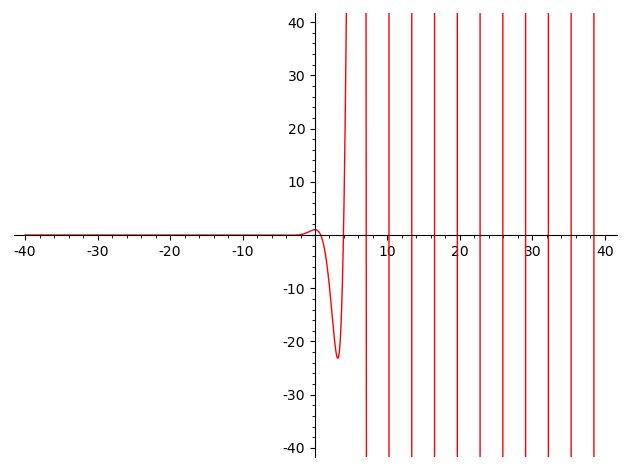

In [9]:
# Definimos la función y calculamos su derivada.
f(x) = (e**x)*cos(x)
f1 = diff(f(x), x)

# Dibujamos la gráfica de la derivada.
show(plot(f1,-40, 40, ymin=-40,ymax=40, color='red'))

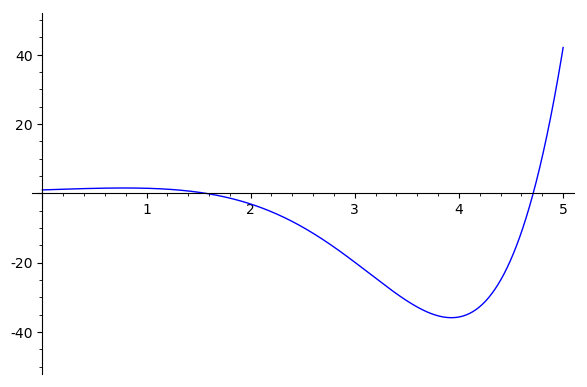

El área es:


58.0641279354108

In [12]:
# Dibujamos la gráfica f en el intervalo [0,5] como ayuda.
show(plot(f(x), 0, 5, ymin=-50,ymax=50, color='blue'))

# Calculamos la integral (área entre la gráfica y el eje)
# El área buscada es la que se encuentra debajo del eje x y encima de la función f
# Podemos calcular los puntos de corte en ese intervalo para saber el intervalo de la integral
eje1 = pi/2
eje2 = (find_root(f(x)==0, 0, 5))
area = -(integrate(f(x), x, eje1, eje2)) # Cambiamos el signo de la integral para que calcule un área positiva.
print("El área es:")
show(area)

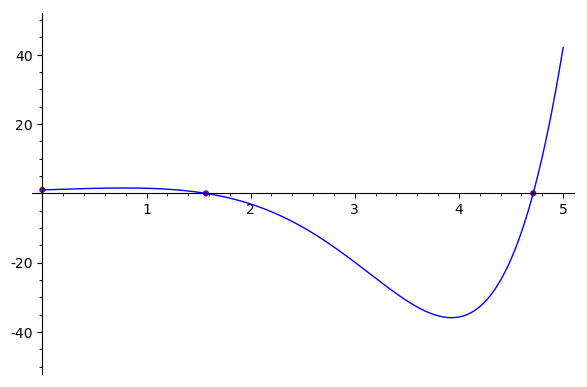

In [11]:
# Los puntos de corte ya los hemos calculado en el ejercicio anterior para hacer la integral.
# Ahora nos limitamos a representarlos.
eje1 = (eje1, 0)
eje2 = (eje2, 0)

# Calculamos el punto de corte con el eje y
eje3 = (0, f(0))

# Representamos la función con los puntos de corte en el intervalo [0,5]
show(plot(f(x), 0, 5, ymin=-50,ymax=50, color='blue') + points(eje1, color="purple", size=20)+ points(eje2, color="purple", size=20) + points(eje3, color="purple", size=20))